In [500]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import functools
import warnings
warnings.filterwarnings('ignore')

# Instructions
1. We will be conducting the entire assignment through this notebook. You will be entering your code in the cells provided, and any explanation and details asked in markdown cells. 
2. You are free to add more code and markdown cells for describing your answer, but make sure they are below the question asked and not somewhere else. 
3. The notebook needs to be submitted on LMS. You can find the submission link [here](https://lms.iiitb.ac.in/moodle/mod/assign/view.php?id=13932). 
4. The deadline for submission is **5th October, 2020 11:59PM**.

# Data import
The data required for this assignment can be downloaded from the following [link](https://www.kaggle.com/dataset/e7cff1a2c6e29e18684fe6b077d3e4c42f9a7ae6199e01463378c60fe4b4c0cc), it's hosted on kaggle. Do check directory paths on your local system.  

In [501]:
alcdata = pd.read_csv("/alcoholism/student-mat.csv")
fifadata = pd.read_csv("/fifa18/data.csv")
accidata1 = pd.read_csv("/accidents/accidents_2005_to_2007.csv")
accidata2 = pd.read_csv("/accidents/accidents_2009_to_2011.csv")
accidata3 = pd.read_csv("/accidents/accidents_2012_to_2014.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/alcoholism/student-mat.csv'

In [502]:
#alcdata = pd.read_csv("student-mat.csv")
#fifadata = pd.read_csv("data.csv")
#accidata1 = pd.read_csv("accidents_2005_to_2007.csv")
#accidata2 = pd.read_csv("accidents_2009_to_2011.csv")
#accidata3 = pd.read_csv("accidents_2012_to_2014.csv")

# Part - 1
## Alcohol Consumption Data
The following data was obtained in a survey of students' math course in secondary school. It contains a lot of interesting social, gender and study information about students. 


### 1. Try to visualize correlations between various features and grades and see which features have a significant impact on grades. 
Try to engineer the three grade parameters (G1, G2 and G3) as one feature for such comparisons.



In [503]:
alcdata

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [504]:
alcdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [505]:
#fig=plt.figure(figsize=(20,10))
#sns.heatmap(alcdata.corr(),cmap = "YlGnBu")
#plt.show()
#alcdata.corr()

In [506]:
#enter code/answer in this cell. You can add more code/markdown cells below for your answer. 
#fig=plt.figure(figsize=(10,5))
#sns.heatmap(alcdata.corr()[["G1","G2","G3"]],cmap = "YlGnBu")
#plt.show()
#alcdata.corr()[["G1","G2","G3"]]

In [507]:
alcdata["G"] = (alcdata["G1"] + alcdata["G3"] + alcdata["G2"])/3

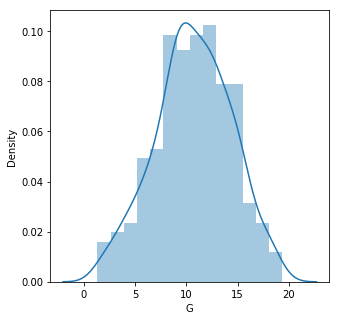

In [508]:
fig = plt.figure(figsize=[5,5])
sns.distplot(alcdata["G"])

In [509]:
alcdata[['failures','G']].groupby(['failures'])['G'].describe()

,count,mean,std,min,25%,50%,75%,max
failures,,,,,,,,
0,312.0,11.356838,3.478123,2.000000,9.333333,11.333333,13.750000,19.333333
1,50.0,8.980000,3.360711,2.333333,6.750000,9.000000,11.666667,18.000000
2,17.0,7.313725,3.518741,1.333333,4.333333,7.666667,9.000000,14.666667
3,16.0,6.354167,2.465972,1.666667,4.833333,7.166667,8.333333,9.000000


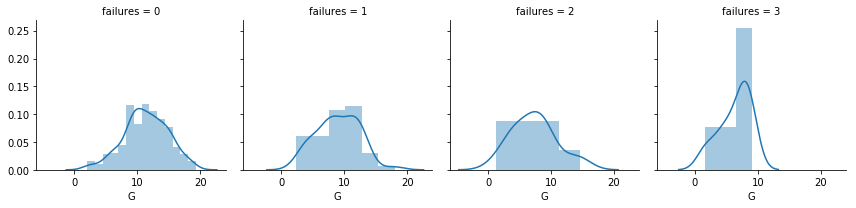

In [510]:
g = sns.FacetGrid(alcdata, col = "failures")
g.map(sns.distplot, "G")

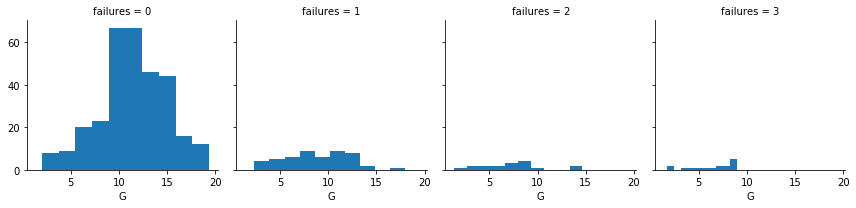

In [511]:
g = sns.FacetGrid(alcdata, col = "failures")
g.map(plt.hist,"G")

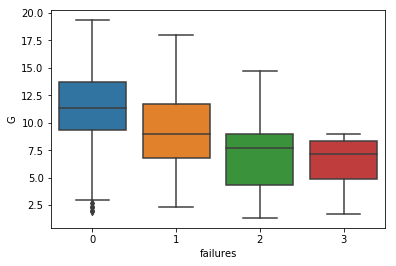

In [512]:
fig = plt.figure()
sns.boxplot(x = "failures", y = "G", data = alcdata)

### Interpretation for G(avg grade) and failures feature.
By observing distribution plot, histogram, box plot for each category of Failures and grouped data table:<br>
-->From distribution plot we can say that distribution of G(avg grade) of students for failures 0,1,2 are almost same and all these are quite different fron the distribution plot of students with failures 3. From this we can say G(avg grade) depends on failures.<br>
-->From histogram plots we can say that students who got more than 10 G(avg grade) are mostly have failures 0.<br>
-->From histogram plots we can say that students with failures 3 have G(avg grade) less than 10.<br>
-->From boxplots also we can say that G(avg grade) depends on failures.<br>
-->From the table we can see that as failures increases mean of the G(avg grade) decreases.

In [513]:
alcdata[['sex','G']].groupby(['sex'])['G'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
F,208.0,10.325321,3.614018,1.333333,8.0,10.0,13.000000,18.666667
M,187.0,11.073084,3.757272,1.666667,9.0,11.0,13.666667,19.333333


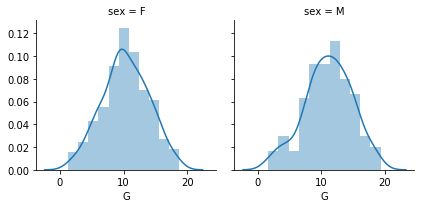

In [514]:
g = sns.FacetGrid(alcdata, col = "sex")
g.map(sns.distplot,"G")

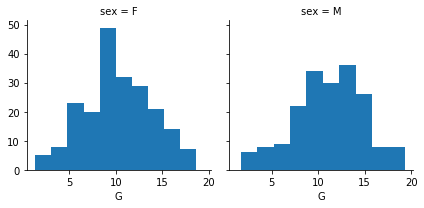

In [515]:
g = sns.FacetGrid(alcdata, col = "sex")
g.map(plt.hist,"G")

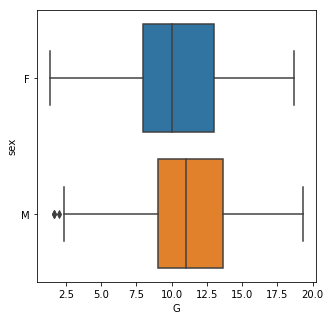

In [516]:
fig = plt.figure(figsize = [5,5])
sns.boxplot(y = "sex", x = "G", data = alcdata)

### Interpretation for G(avg grade) and sex feature.
From above distribution plots, box plots we can say that both boys and girls have same distribution of G(avg grade) which means we can say that G(avg grade) is not dependent of sex.From box plot we can say the G(avg grade) median of boys is some what high compared to that of girls.

In [517]:
alcdata[['school','G']].groupby(['school'])['G'].describe()

,count,mean,std,min,25%,50%,75%,max
school,,,,,,,,
GP,349.0,10.737345,3.717529,1.333333,8.333333,10.666667,13.333333,19.333333
MS,46.0,10.239130,3.543496,3.666667,8.000000,10.166667,12.583333,18.666667


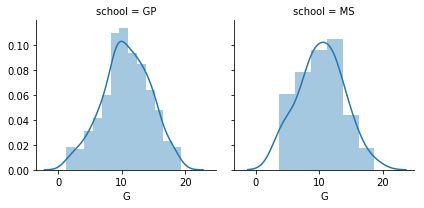

In [518]:
g = sns.FacetGrid(alcdata, col = "school")
g.map(sns.distplot,"G")

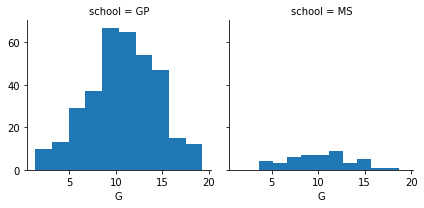

In [519]:
g = sns.FacetGrid(alcdata, col = "school")
g.map(plt.hist,"G")

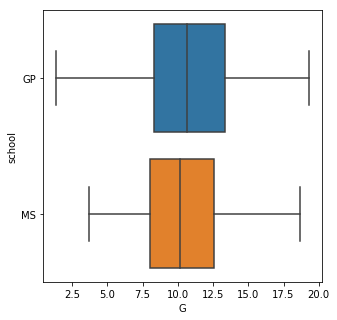

In [520]:
fig = plt.figure(figsize = [5,5])
sns.boxplot(x = "G", y = "school", data = alcdata)

### Interpretation for G(avg grade) and school feature.
By observing above distribution plots, box plots, histograms, grouped data table:<br>
-->From distplot we can say that both school GP and MS have same distribution of G(avg grade) which means we can -say that G(avg grade) is not dependent of school student is studying.<br>
-->From histogram we can see that more students are from 'GP' school.<br>
-->From box plot we can say that G(avg grade) median of 'GP' school is some what higher than that of 'MS' school.

In [521]:
alcdata[['studytime','G']].groupby(['studytime'])['G'].describe()

,count,mean,std,min,25%,50%,75%,max
studytime,,,,,,,,
1,105.0,10.253968,4.135918,1.333333,7.666667,10.333333,13.000000,18.666667
2,198.0,10.442761,3.380017,2.000000,8.333333,10.333333,12.666667,18.333333
3,65.0,11.651282,3.655490,2.333333,9.333333,11.666667,14.333333,18.666667
4,27.0,11.728395,3.815216,5.333333,8.666667,12.000000,14.333333,19.333333


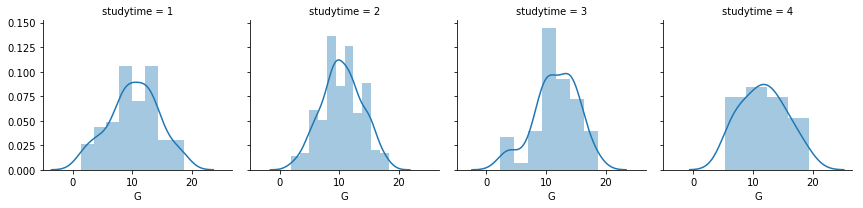

In [522]:
g = sns.FacetGrid(alcdata, col = "studytime")
g.map(sns.distplot,"G")

### Interpretation for G(avg grade) and school feature.
By observing above distribution plots, grouped data table:<br>
-->From distribution plots we can say that, all plots are not same which means we can say that they are G(avg grade) is dependent on studytime.<br>
-->From the table we can see the mean of the G(avg grade) for each class is increasing as study time increases. Maximum grade(19.3) student spent more study time(4).

### 2. If there is a need for encoding some of the features,  how would you go  about it? 
Would you consider combining certain encodings together ?


In [523]:
#Checking unique values of each feature.
alcdata_copy1 = alcdata
for i in alcdata.columns:
     print(i,"unique_values:",alcdata[i].unique(),",length=",alcdata[i].unique().shape[0])

school unique_values: ['GP' 'MS'] ,length= 2
sex unique_values: ['F' 'M'] ,length= 2
age unique_values: [18 17 15 16 19 22 20 21] ,length= 8
address unique_values: ['U' 'R'] ,length= 2
famsize unique_values: ['GT3' 'LE3'] ,length= 2
Pstatus unique_values: ['A' 'T'] ,length= 2
Medu unique_values: [4 1 3 2 0] ,length= 5
Fedu unique_values: [4 1 2 3 0] ,length= 5
Mjob unique_values: ['at_home' 'health' 'other' 'services' 'teacher'] ,length= 5
Fjob unique_values: ['teacher' 'other' 'services' 'health' 'at_home'] ,length= 5
reason unique_values: ['course' 'other' 'home' 'reputation'] ,length= 4
guardian unique_values: ['mother' 'father' 'other'] ,length= 3
traveltime unique_values: [2 1 3 4] ,length= 4
studytime unique_values: [2 3 1 4] ,length= 4
failures unique_values: [0 3 2 1] ,length= 4
schoolsup unique_values: ['yes' 'no'] ,length= 2
famsup unique_values: ['no' 'yes'] ,length= 2
paid unique_values: ['no' 'yes'] ,length= 2
activities unique_values: ['no' 'yes'] ,length= 2
nursery uniqu

### Features to Encode:
-->From the above info we can encode the features which take only two unique values ('school','sex','address','famsize','Pstatus','schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic') by directly mapping to 0 or 1 i.e binary encoding.<br>
-->Features "Mjob","Fjob","reason","guardian" are converted into numerical by one hot encoding.

In [524]:
#enter code/answer in this cell. You can add more code/markdown cells below for your answer. 
alcdata_copy = alcdata
alcdata_copy['school'] = alcdata_copy['school'].map({'GP':0, 'MS':1})
alcdata_copy['sex'] = alcdata_copy['sex'].map({'F':0, 'M':1})
alcdata_copy['address'] = alcdata_copy['address'].map({'U':0, 'R':1})
alcdata_copy['famsize'] = alcdata_copy['famsize'].map({'GT3':0, 'LE3':1})
alcdata_copy['Pstatus'] = alcdata_copy['Pstatus'].map({'A':0, 'T':1})

yes_no_columns = ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
for i in yes_no_columns:
        alcdata_copy[i] = alcdata_copy[i].map({'yes':1, 'no':0})

In [525]:
#for i in alcdata_copy.columns:
    #print(i,"unique_values:",alcdata_copy[i].unique(),",length=",alcdata_copy[i].unique().shape[0])
#    if(alcdata_copy[i].unique().shape[0] == 2):
#        alcdata_copy = pd.concat([alcdata_copy, pd.get_dummies(alcdata_copy[i], prefix = i, dtype = int)], axis = 1)
#        alcdata_copy.drop([i], axis = 1, inplace = True)
#        #print(i,"unique_values:",alcdata_copy[i].unique(),",length=",alcdata_copy[i].unique().shape[0]) 
#for i in alcdata_copy.columns:
#     print(i,"unique_values:",alcdata_copy[i].unique(),",length=",alcdata_copy[i].unique().shape[0])

In [526]:
object_columns = ["Mjob","Fjob","reason","guardian"]
for i in object_columns:
        alcdata_copy = pd.concat([alcdata_copy,pd.get_dummies(alcdata_copy[i], prefix = i,dtype = int)], axis = 1)
        alcdata_copy = alcdata_copy.drop([i],axis = 1)
for i in alcdata_copy.columns:
     print(i,"unique_values:",alcdata_copy[i].unique(),",length=",alcdata_copy[i].unique().shape[0])

school unique_values: [0 1] ,length= 2
sex unique_values: [0 1] ,length= 2
age unique_values: [18 17 15 16 19 22 20 21] ,length= 8
address unique_values: [0 1] ,length= 2
famsize unique_values: [0 1] ,length= 2
Pstatus unique_values: [0 1] ,length= 2
Medu unique_values: [4 1 3 2 0] ,length= 5
Fedu unique_values: [4 1 2 3 0] ,length= 5
traveltime unique_values: [2 1 3 4] ,length= 4
studytime unique_values: [2 3 1 4] ,length= 4
failures unique_values: [0 3 2 1] ,length= 4
schoolsup unique_values: [1 0] ,length= 2
famsup unique_values: [0 1] ,length= 2
paid unique_values: [0 1] ,length= 2
activities unique_values: [0 1] ,length= 2
nursery unique_values: [1 0] ,length= 2
higher unique_values: [1 0] ,length= 2
internet unique_values: [0 1] ,length= 2
romantic unique_values: [0 1] ,length= 2
famrel unique_values: [4 5 3 1 2] ,length= 5
freetime unique_values: [3 2 4 1 5] ,length= 5
goout unique_values: [4 3 2 1 5] ,length= 5
Dalc unique_values: [1 2 5 3 4] ,length= 5
Walc unique_values: [1 3

In [527]:
alcdata_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 47 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   school             395 non-null    int64  
 1   sex                395 non-null    int64  
 2   age                395 non-null    int64  
 3   address            395 non-null    int64  
 4   famsize            395 non-null    int64  
 5   Pstatus            395 non-null    int64  
 6   Medu               395 non-null    int64  
 7   Fedu               395 non-null    int64  
 8   traveltime         395 non-null    int64  
 9   studytime          395 non-null    int64  
 10  failures           395 non-null    int64  
 11  schoolsup          395 non-null    int64  
 12  famsup             395 non-null    int64  
 13  paid               395 non-null    int64  
 14  activities         395 non-null    int64  
 15  nursery            395 non-null    int64  
 16  higher             395 non

From the above info we can say that every column is in int type.


### 3. Try to find out how family relation(famrel) and parents cohabitation(Pstatus) affect grades of students. 


In [528]:
#enter code/answer in this cell. You can add more code/markdown cells below for your answer. 
#alcdata["famrel"]

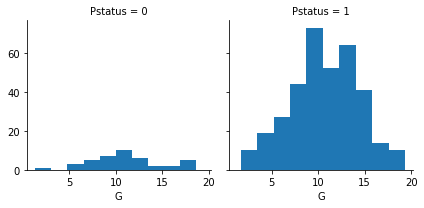

In [529]:
g=sns.FacetGrid(alcdata, col = "Pstatus")
g.map(plt.hist,'G')

Here Pstatus = 0 mean Patents are apart and Pstatus = 1 means parents are together.

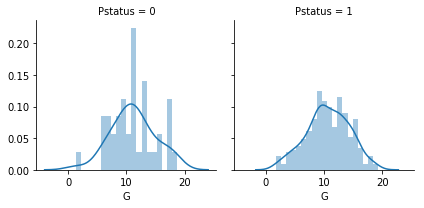

In [530]:
g=sns.FacetGrid(alcdata, col = "Pstatus")
g.map(sns.distplot,'G',bins=20)

In [531]:
alcdata[['Pstatus','G']].groupby(['Pstatus'])['G'].describe()

,count,mean,std,min,25%,50%,75%,max
Pstatus,,,,,,,,
0,41.0,11.146341,3.774217,1.333333,9.000000,11.000000,13.000000,18.666667
1,354.0,10.625235,3.689325,1.666667,8.333333,10.666667,13.333333,19.333333


### Interpretation of Pstatus and G(avg grade):
-->As we can see the distribution plot of grades of students whose parents are together and apart are almost same which means Pstatus doesnot affect G(avg grade) of students.<br>
-->From the table we can say mean of grades of these two classes i.e  are almost same.

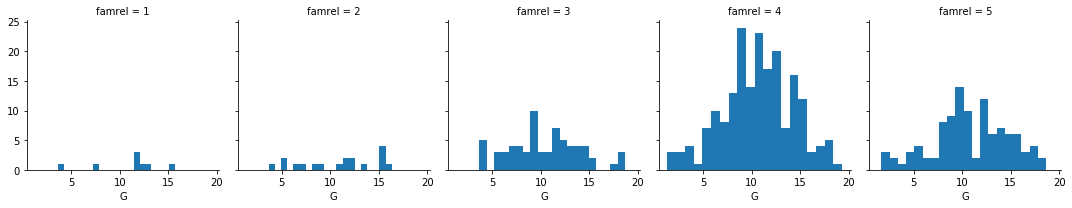

In [532]:
g=sns.FacetGrid(alcdata, col = "famrel")
g.map(plt.hist,'G',bins=20)

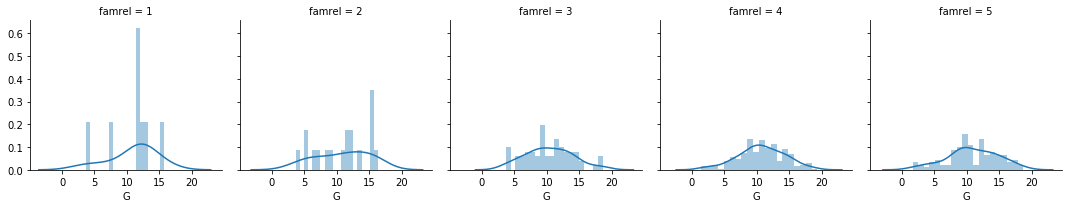

In [533]:
g=sns.FacetGrid(alcdata, col = "famrel")
g.map(sns.distplot,'G',bins=20)

In [534]:
alcdata[['famrel','G']].groupby(['famrel'])['G'].describe()

,count,mean,std,min,25%,50%,75%,max
famrel,,,,,,,,
1,8.0,10.958333,3.657727,3.666667,10.666667,12.000000,12.416667,15.666667
2,18.0,10.777778,4.087283,3.666667,7.333333,11.500000,14.916667,16.333333
3,68.0,10.387255,3.617541,3.666667,7.916667,10.000000,13.000000,18.666667
4,195.0,10.664957,3.614198,1.333333,8.500000,10.666667,13.000000,19.333333
5,106.0,10.855346,3.886490,1.666667,9.000000,10.500000,13.666667,18.666667


### Interpretation of Pstatus and G(avg grade):
-->From the above distribution plots and table we can say that for all kinds of family relations(numeric: from 1 - very bad to 5 - excellent) G(avg grade) have almosst same distribution which means famrel doesnot effet G(avg grade) of students.

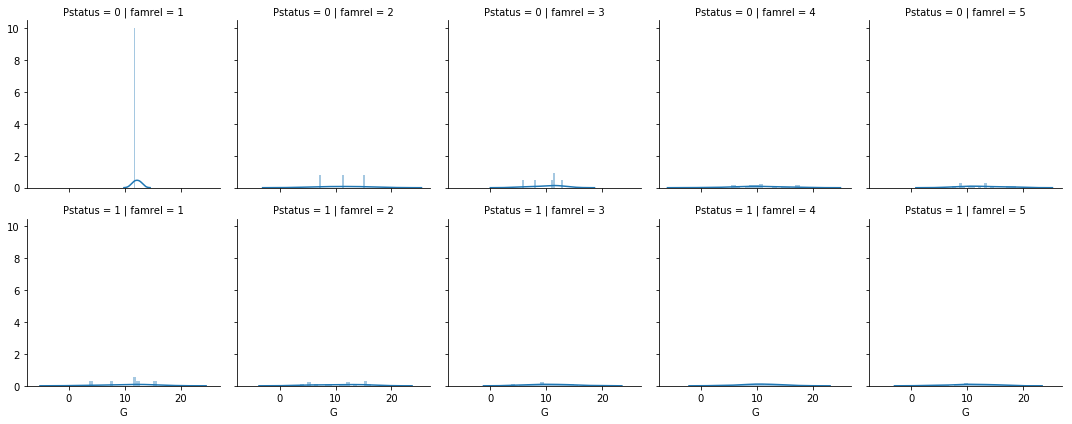

In [535]:
g=sns.FacetGrid(alcdata,col = "famrel",row = "Pstatus")
g.map(sns.distplot,'G',bins=20)

### Interpretation of G(avg grade) and (Pstatus,famrel) features:
(Here Pstatus = 0 mean Patents are apart and Pstatus = 1 means parents are together.)
Distribution plot of each category of (Pstatus and famrel):
-->From this plots we can say that all categories have same distribution except for (Pstatus=0,famrel=1) because only one student was there which we can neglect.<br>


### 4. Figure out which features in the data are skewed, and propose a way to remove skew from all such columns. 

In [536]:
from scipy.stats import skew
nonobject_features = alcdata.dtypes[alcdata.dtypes != 'object'].index
skew_features = alcdata[nonobject_features].apply(lambda x : skew(x)).sort_values(ascending=False)
print(skew_features)

absences      3.657622
school        2.391393
failures      2.377951
schoolsup     2.212093
Dalc          2.182434
traveltime    1.600920
address       1.332397
famsize       0.933063
romantic      0.703083
studytime     0.629739
Walc          0.609634
age           0.464498
G1            0.239699
paid          0.167675
goout         0.116060
sex           0.106480
Fedu         -0.031552
activities   -0.035449
G            -0.140013
freetime     -0.162730
Medu         -0.317170
G2           -0.430004
famsup       -0.462526
health       -0.492723
G3           -0.729887
famrel       -0.948263
nursery      -1.460995
internet     -1.784785
Pstatus      -2.598070
higher       -4.099187
dtype: float64


Text(0,0.5,'freq')

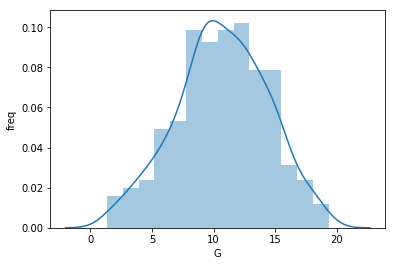

In [537]:
from scipy.stats import norm
fig1 = plt.figure()
sns.distplot(alcdata["G"])
plt.ylabel('freq')

-->From the graph we can say that data Grades are not highly skewed.<br>
-->If data is skewed we can remove it by some appropriate non linear function.<br>
-->Remaining columns are all categorical which means we cant define distribution to that features so we cant define skew to that data.

# Part - 2
## FIFA 2019  Data


### 1. Which clubs are the most economical? How did you decide that?

In [538]:
fifadata = pd.read_csv("data.csv")

In [539]:
fifadata.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [540]:
fifadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [541]:
pd.DatetimeIndex(fifadata['Contract Valid Until']).year.astype('float')

Float64Index([2021.0, 2022.0, 2022.0, 2020.0, 2023.0, 2020.0, 2020.0, 2021.0,
              2020.0, 2021.0,
              ...
              2018.0, 2021.0, 2021.0, 2019.0, 2018.0, 2019.0, 2020.0, 2021.0,
              2019.0, 2019.0],
             dtype='float64', name='Contract Valid Until', length=18207)

In [542]:
pd.DatetimeIndex(fifadata['Joined']).year.astype('float')

Float64Index([2004.0, 2018.0, 2017.0, 2011.0, 2015.0, 2012.0, 2012.0, 2014.0,
              2005.0, 2014.0,
              ...
              2018.0, 2018.0, 2018.0, 2015.0, 2018.0, 2017.0, 2018.0, 2017.0,
              2018.0, 2018.0],
             dtype='float64', name='Joined', length=18207)

In [543]:
fifadata_copy = fifadata
fifadata_copy['Contract_Valid_years'] = pd.DatetimeIndex(fifadata['Contract Valid Until']).year.astype('float')-pd.DatetimeIndex(fifadata['Joined']).year.astype('float')

fifadata_copy['Contract_Valid_years'] says how many years player belongs to particular club.

In [544]:
#Convert function used to convert given money in string type to int type.
def convert(x):
    y = x.replace('€', '')
    if 'K' in y:
        y = float(y.replace('K', ''))*1000
    elif 'M' in y:
        y = float(y.replace('M', ''))*1000000
    return float(y)

In [545]:
#Using Convert(x) function to convert "Value" and "Wage". (Here Value is interpreted as cost of the player)
fifadata_copy['Value'] = fifadata_copy['Value'].apply(lambda x: convert(x))
fifadata_copy['Wage'] = fifadata_copy['Wage'].apply(lambda x: convert(x))
fifadata_copy['Value'] = fifadata_copy['Value'].fillna(0)
fifadata_copy['Wage'] = fifadata_copy['Wage'].fillna(0)

In [546]:
#Amount_spent by club on player is Value+(Wage)*(no of years contract valid).
fifadata_copy['amount_spent'] = fifadata_copy['Value'] + (fifadata_copy['Wage']*fifadata_copy['Contract_Valid_years'])
fifadata_copy['amount_spent']

0        120105000.0
1         78620000.0
2        119950000.0
3         74340000.0
4        104840000.0
            ...     
18202        62000.0
18203        62000.0
18204        64000.0
18205        61000.0
18206        61000.0
Name: amount_spent, Length: 18207, dtype: float64

In [547]:
#economical metric for a player is (amount_spent/Overall performance).
fifadata_copy['eco_metric'] = (fifadata_copy['amount_spent'] / fifadata_copy['Overall'])
fifadata_copy['eco_metric']

0        1.277713e+06
1        8.363830e+05
2        1.303804e+06
3        8.169231e+05
4        1.152088e+06
             ...     
18202    1.319149e+03
18203    1.319149e+03
18204    1.361702e+03
18205    1.297872e+03
18206    1.326087e+03
Name: eco_metric, Length: 18207, dtype: float64

In [548]:
club_eco = fifadata_copy[["Club", "eco_metric"]].groupby(['Club'])
club_eco["eco_metric"].describe()['mean'].sort_values(ascending = False)

Club
Juventus             338711.778786
Real Madrid          323724.009096
FC Barcelona         313734.754088
Manchester City      287741.857750
FC Bayern München    262787.970852
                         ...      
Morecambe              2744.216268
Derry City             2590.829418
Bohemian FC            2282.001132
Limerick FC            1938.863428
Bray Wanderers         1562.703825
Name: mean, Length: 651, dtype: float64

### Reason:
-->To say whether Club is more economical, we can take eco_metric i.e amount_spent/Overall performance of each player of that club and take mean.<br>
-->As economic means giving good value or return in relation to the money, time, or effort expended I took amount spent on the player and his overall performance as metrics to calculate.
### Top 5 Economical Clubs:
-->From the above table we can say that Juventus, Real Madrid, FC Barcelona, Manchester City, FC Bayern München are more economical.

### 2. What is the relationship between age and individual potential of the player? How does age influence the players' value? At what age does the player exhibit peak pace ?

In [549]:
#enter code/answer in this cell. You can add more code/markdown cells below for your answer. 
fifadata_copy["Age"].unique()
#fifadata["Age"]

array([31, 33, 26, 27, 32, 25, 29, 28, 24, 30, 19, 40, 22, 23, 34, 35, 36,
       37, 21, 18, 20, 39, 41, 17, 38, 45, 42, 16, 44])

In [550]:
fifadata_copy["Potential"].unique()
#fifadata["Potential"]

array([94, 93, 92, 91, 90, 89, 95, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79,
       78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62,
       61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 48])

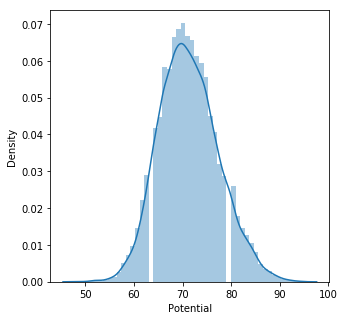

In [551]:
fig = plt.figure(figsize = [5, 5])
sns.distplot(fifadata_copy["Potential"])

Distribution plot of Potential.

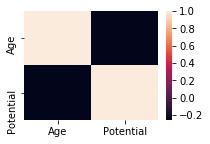

,Age,Potential
Age,1.000000,-0.253312
Potential,-0.253312,1.000000


In [552]:
age_potential = fifadata_copy[["Age", "Potential"]]
fig=plt.figure(figsize=(3,2))
sns.heatmap(age_potential.corr())
plt.show()
age_potential.corr() #coorelation between Age and Potential of the player.

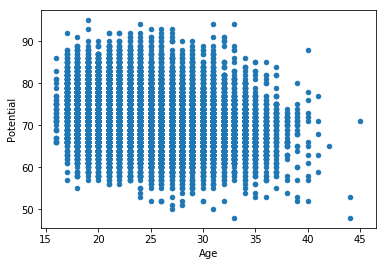

In [553]:
fig = plt.figure(figsize=(20,10))
fifadata_copy.plot.scatter(x='Age', y='Potential')
plt.show()

In [554]:
fifadata_copy[['Age','Potential']].groupby('Age').describe()

Potential                                                     
        count       mean       std   min    25%   50%    75%   max
Age                                                               
16       42.0  73.190476  4.824926  66.0  70.25  73.0  75.75  86.0
17      289.0  74.339100  6.235753  57.0  70.00  74.0  79.00  92.0
18      732.0  73.530055  6.153123  55.0  69.00  74.0  78.00  91.0
19     1024.0  73.146484  6.058692  57.0  69.00  73.0  77.00  95.0
20     1240.0  73.213710  6.000025  57.0  69.00  73.0  77.00  90.0
21     1423.0  72.957836  6.302806  56.0  69.00  73.0  77.00  92.0
22     1340.0  72.819403  5.872958  56.0  69.00  73.0  77.00  92.0
23     1332.0  72.555556  6.079543  57.0  68.00  72.0  77.00  92.0
24     1358.0  72.079529  5.961026  53.0  68.00  72.0  76.00  94.0
25     1319.0  71.290371  5.942044  52.0  67.00  71.0  75.00  93.0
26     1387.0  70.176640  5.797430  52.0  66.00  70.0  74.00  93.0
27     1162.0  69.709122  5.907825  50.0  65.25  69.0  73.00  93.0
28     1101.0  69.444142  5.811886  51.0  65.00  69.0  73.00  90.0
29      959.0  69.357664  5.712887  54.0  66.00  69.0  73.00  90.0
30      917.0  69.700109  5.399593  52.0  66.00  69.0  73.00  89.0
31      707.0  69.850071  5.958557  50.0  66.00  70.0  73.00  94.0
32      574.0  69.529617  5.746688  52.0  66.00  69.0  73.00  91.0
33      408.0  69.558824  5.680820  48.0  66.00  69.0  73.00  94.0
34      404.0  69.539604  5.198866  54.0  66.00  69.0  73.00  86.0
35      196.0  68.132653  5.594205  53.0  65.00  68.0  71.00  85.0
36      127.0  67.937008  5.502882  53.0  64.00  67.0  71.00  85.0
37       82.0  68.939024  6.041722  55.0  64.25  70.0  73.00  84.0
38       37.0  67.378378  4.698412  54.0  65.00  68.0  71.00  74.0
39       25.0  67.640000  6.806125  52.0  65.00  70.0  72.00  80.0
40       13.0  67.692308  9.902732  52.0  61.00  66.0  73.00  88.0
41        5.0  67.600000  6.985700  59.0  63.00  68.0  71.00  77.0
42        1.0  65.000000       NaN  65.0  65.00  65.0  65.00  65.0
44        2.0  50.500000  3.535534  48.0  49.25  50.5  51.75  53.0
45        1.0  71.000000       NaN  71.0  71.00  71.0  71.00  71.0

### Interpretation for Age and Potential features.
-->From the above analysis(scatterplot, age_potential info, Correalation) we can say that young players have more potential than old players i.e as age increases potential decreases.<br>
-->Maximum Potential(95) occured at the Age of 19.

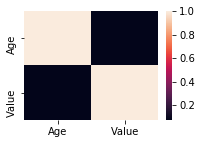

,Age,Value
Age,1.000000,0.075022
Value,0.075022,1.000000


In [555]:
age_value = fifadata_copy[["Age", "Value"]]
fig=plt.figure(figsize=(3,2))
sns.heatmap(age_value.corr())
plt.show()
age_value.corr()

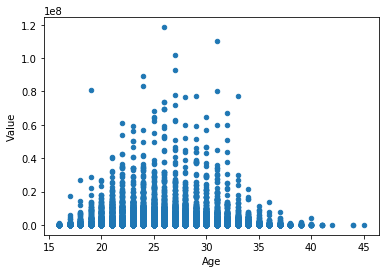

In [556]:
fig = plt.figure(figsize=(20,10))
fifadata_copy.plot.scatter(x='Age', y='Value')
plt.show()

In [557]:
fifadata_copy[['Age','Value']].groupby('Age').describe()

Value                                                             \
      count          mean           std       min       25%        50%   
Age                                                                      
16     42.0  2.164286e+05  2.191956e+05   50000.0   75000.0   120000.0   
17    289.0  4.047059e+05  1.166704e+06   40000.0  100000.0   180000.0   
18    732.0  5.319672e+05  1.435544e+06       0.0  120000.0   210000.0   
19   1024.0  9.098193e+05  3.228602e+06       0.0  150000.0   300000.0   
20   1240.0  1.233161e+06  2.604436e+06       0.0  200000.0   450000.0   
21   1423.0  1.765218e+06  3.753851e+06       0.0  230000.0   575000.0   
22   1340.0  2.225366e+06  5.108313e+06       0.0  325000.0   650000.0   
23   1332.0  2.647995e+06  5.447848e+06       0.0  375000.0   775000.0   
24   1358.0  3.007382e+06  6.304422e+06       0.0  450000.0   875000.0   
25   1319.0  3.258078e+06  6.341951e+06       0.0  500000.0   925000.0   
26   1387.0  3.364795e+06  7.736183e+06       0.0  500000.0   925000.0   
27   1162.0  3.530000e+06  7.697981e+06       0.0  475000.0   950000.0   
28   1101.0  3.164160e+06  5.729158e+06       0.0  475000.0   900000.0   
29    959.0  3.142643e+06  6.480115e+06       0.0  475000.0   825000.0   
30    917.0  3.050921e+06  5.737468e+06       0.0  475000.0  1000000.0   
31    707.0  3.324498e+06  7.508272e+06       0.0  425000.0   950000.0   
32    574.0  2.574817e+06  5.861103e+06       0.0  375000.0   600000.0   
33    408.0  1.950637e+06  4.927056e+06       0.0  260000.0   525000.0   
34    404.0  1.283663e+06  2.141936e+06       0.0  230000.0   512500.0   
35    196.0  8.149235e+05  1.571168e+06       0.0  130000.0   250000.0   
36    127.0  5.959449e+05  1.568411e+06   10000.0   70000.0   200000.0   
37     82.0  6.253049e+05  1.182385e+06       0.0   62500.0   240000.0   
38     37.0  2.109459e+05  2.551057e+05       0.0   40000.0   130000.0   
39     25.0  2.480000e+05  3.781644e+05       0.0   40000.0   120000.0   
40     13.0  3.857692e+05  1.097015e+06       0.0       0.0    10000.0   
41      5.0  1.400000e+04  2.607681e+04       0.0       0.0        0.0   
42      1.0  4.000000e+04           NaN   40000.0   40000.0    40000.0   
44      2.0  0.000000e+00  0.000000e+00       0.0       0.0        0.0   
45      1.0  1.600000e+05           NaN  160000.0  160000.0   160000.0   

                             
           75%          max  
Age                          
16    237500.0    1000000.0  
17    400000.0   17500000.0  
18    500000.0   27000000.0  
19    700000.0   81000000.0  
20    975000.0   27000000.0  
21   1200000.0   41000000.0  
22   1300000.0   61000000.0  
23   2400000.0   59500000.0  
24   2600000.0   89000000.0  
25   3300000.0   68000000.0  
26   3300000.0  118500000.0  
27   3575000.0  102000000.0  
28   3600000.0   76500000.0  
29   3050000.0   77000000.0  
30   3600000.0   64500000.0  
31   3100000.0  110500000.0  
32   2400000.0   67000000.0  
33   2050000.0   77000000.0  
34   1600000.0   21500000.0  
35    775000.0   11500000.0  
36    425000.0   14000000.0  
37    637500.0    8000000.0  
38    270000.0    1300000.0  
39    260000.0    1600000.0  
40    160000.0    4000000.0  
41     10000.0      60000.0  
42     40000.0      40000.0  
44         0.0          0.0  
45    160000.0     160000.0

### Interpretation for Age and Value features.
-->From the above analysis(scatterplot, age_potential info, Correalation)we can say that value is high for those players who are neither too young nor too old i.e players of age around 23-32 have move value compared to others.<br>
-->Maximum Value of the player(118500000.0) is for player of Age 26.

### 3. What skill sets are helpful in deciding a player's potential? How do the traits contribute to the players' potential? 

In [558]:
fifadata_copy["Release Clause"].fillna(0,inplace = True)

In [559]:
fifadata_copy['Release Clause'].replace({'€':'','K': '*1e3', 'M': '*1e6'}, regex=True,inplace = True)
fifadata_copy['Release Clause'] = fifadata_copy['Release Clause'].map(pd.eval)

#### Intuition:
--> Skills like StandingTackle, LongPassing, BallControl, SlidingTackle, LongShots, ShortPassing, Dribbling these skills we be helpful for a player to decide his potential.<br>
--> Traits like Agility, Stamina, Strength, Vision, Reactions are helpful to decide the Potential of the player.

In [560]:
#enter code/answer in this cell. You can add more code/markdown cells below for your answer.
#fifadata_copy = fifadata_copy.drop(['Unnamed: 0','ID'], axis = 1)
fifadata_copy.corr()['Potential'].sort_values()

Unnamed: 0                 -0.633395
Age                        -0.253312
GKKicking                  -0.059061
GKHandling                 -0.054672
GKDiving                   -0.053446
GKReflexes                 -0.053341
GKPositioning              -0.052589
Jersey Number              -0.010474
ID                          0.047074
Strength                    0.075769
Jumping                     0.109151
SlidingTackle               0.128980
Balance                     0.138025
StandingTackle              0.143564
Interceptions               0.154908
Weak Foot                   0.162346
Marking                     0.162801
Aggression                  0.171174
HeadingAccuracy             0.200988
Stamina                     0.202563
Contract_Valid_years        0.212167
Agility                     0.222310
Penalties                   0.224281
FKAccuracy                  0.230544
Acceleration                0.234608
SprintSpeed                 0.236771
Finishing                   0.243355
P

##### Skills:
-->From above correlation vector we can say skills like ShortPassing, BallControl, Skill Moves, LongPassing, Dribbling, LongShots, Crossin, Positioning, Finishing these skills are highly related to the Potential of the player compared to other skills.<br>
-->From the above info we can say that StandingTackle, SlidingTackle are not that much related to the Potential when compared with other skills mention in the intuition above.<br>


##### Traits:
-->From above correlation vector we can say that traits like Reactions, Composure, Vision, Acceleration, Agility are highly related to the Potential of the player compared to other traits.<br>
--> From the above table we can say that Stamina, Strength are not that much required when compared to Reactions, Composure, Acceleration. Indeed we can say that all these traits require sufficient amount of strength and stamina.

### 4. Which features directly contribute to the wages of the players?

In [561]:
fifadata_copy["Wage"]

0        565000.0
1        405000.0
2        290000.0
3        260000.0
4        355000.0
           ...   
18202      1000.0
18203      1000.0
18204      1000.0
18205      1000.0
18206      1000.0
Name: Wage, Length: 18207, dtype: float64

In [562]:
#enter code/answer in this cell. You can add more code/markdown cells below for your answer. 
#player_wage = fifadata["Wage"].map(lambda x: x.replace("€", ""))
#player_wage = player_wage.map(lambda x: x.replace("K", ""))
#player_wage = player_wage.astype(int)*1000
#player_wage.head()
#fifadata.loc[:, "Wage"] = player_wage.values
#fifadata["Wage"].dtypes

#### Intuitions :
1. International reputation of the player will be directly related to the Wage of the player.
2. Wage of the player will be depend on Release Clause of the player.
3. Overall performance of the player decides how much Wage player need to get.
4. Age of the player decides how much Wage player need to get as young player may not have good amount of experience.

In [563]:
fifadata_copy.corr()['Wage'].sort_values()

Unnamed: 0                 -0.479719
ID                         -0.204610
Jersey Number              -0.086561
GKKicking                  -0.028325
GKReflexes                 -0.025992
GKDiving                   -0.025595
GKPositioning              -0.025489
GKHandling                 -0.025177
Balance                     0.088873
SlidingTackle               0.111025
Acceleration                0.124985
StandingTackle              0.126291
Jumping                     0.129691
SprintSpeed                 0.130315
Strength                    0.139360
Weak Foot                   0.140849
Age                         0.141145
Marking                     0.145594
Agility                     0.156287
Interceptions               0.157415
Stamina                     0.177562
HeadingAccuracy             0.187967
Aggression                  0.194581
Finishing                   0.217439
Penalties                   0.222440
Contract_Valid_years        0.223205
Positioning                 0.226775
C

### Interpretation of Wage feature:
-->From the above correlation vector of Wage, we can say amount_spent for a player(value + total_wage), eco_metric(amount_spent/Overall performance) for a player, Release Clause of the player, Value of the player, International Reputation of the player, Overall performance of the player are positively/directly contribute to Wage.<br>
-->From coorelation vector of Wage 1,2,3 intuitions mentioned above are correct. While 4 intuition i.e Age is related to Wage but not with high metric. 

### 5. What is the age distribution in different clubs? Which club has most players young?

In [564]:
club_agedist = fifadata_copy[["Club", "Age"]].groupby(['Club'])
club_agedist["Age"].describe()

,count,mean,std,min,25%,50%,75%,max
Club,,,,,,,,
SSV Jahn Regensburg,29.0,25.655172,3.667189,19.0,23.00,25.0,28.00,33.0
1. FC Heidenheim 1846,28.0,24.000000,4.268749,17.0,21.00,23.5,27.00,32.0
1. FC Kaiserslautern,26.0,23.846154,4.173174,19.0,20.25,23.0,26.75,33.0
1. FC Köln,28.0,24.321429,4.447667,17.0,21.00,24.0,28.00,35.0
1. FC Magdeburg,26.0,24.692308,3.760524,19.0,22.00,23.5,27.00,32.0
...,...,...,...,...,...,...,...,...
Zagłębie Sosnowiec,25.0,26.240000,4.780865,18.0,23.00,26.0,31.00,36.0
Çaykur Rizespor,30.0,25.433333,3.701662,19.0,23.00,25.0,28.75,34.0
Örebro SK,27.0,24.037037,5.265866,16.0,20.00,23.0,28.50,34.0


-->Above table shows the distribution of age corresponding to each Club. 

In [565]:
club_agedist["Age"].describe()['mean'].sort_values(ascending = False)

Club
Paraná                      31.600000
Cruzeiro                    30.600000
Atlético Paranaense         30.400000
Chapecoense                 30.400000
Botafogo                    30.400000
                              ...    
FC Admira Wacker Mödling    21.925926
FC Sochaux-Montbéliard      21.678571
Bohemian FC                 21.480000
FC Groningen                21.423077
FC Nordsjælland             20.259259
Name: mean, Length: 651, dtype: float64

-->Above tables shows the decreasing order of mean of players age of particular Club.

In [566]:
#players who are greater than 25 are not considered as young.
def young_def(x):
    if x>25:
        return 0
    else:
        return 1
    
#function to count no of young players from each Club.
def no_of_young(data):
    return reduce(lambda x,y:x+y, data.apply(young_def))

yng_players_per_club = club_agedist.agg({'Age':[no_of_young]})
yng_players_per_club.sort_values([('Age','no_of_young')],ascending = False)

,Age
,no_of_young
Club,
Barnsley,28
Envigado FC,26
RC Celta,26
FC Sochaux-Montbéliard,26
Chamois Niortais Football Club,25
...,...
Ceará Sporting Club,0
Bahia,0


--> From the above table we can say the Club 'Barnsley' has more no of young players.

# Part - 3
## UK Road Accidents Data


The UK government amassed traffic data from 2000 and 2016, recording over 1.6 million accidents in the process and making this one of the most comprehensive traffic data sets out there. It's a huge picture of a country undergoing change.

### 1. The very first step should be to merge all the 3 subsets of the data.

In [567]:
accidata1.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Year'],
      dtype='object')

In [568]:
#enter code/answer in this cell. You can add more code/markdown cells below for your answer. 
accidata1.columns == accidata2.columns #checking columns of accidata1 and accidata2.

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [569]:
accidata2.columns == accidata3.columns #checking columns of accidata2 and accidata3.

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [570]:
accidata_rows = accidata1.shape[0] + accidata2.shape[0] + accidata3.shape[0]

In [571]:
accidata_list = [accidata1, accidata2, accidata3]
accidata = pd.concat(accidata_list, axis = 0)

-->accidata1, accidata2, accidata3 is merged as accidata.

In [572]:
accidata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1504150 entries, 0 to 464696
Data columns (total 33 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Accident_Index                               1504150 non-null  object 
 1   Location_Easting_OSGR                        1504049 non-null  float64
 2   Location_Northing_OSGR                       1504049 non-null  float64
 3   Longitude                                    1504049 non-null  float64
 4   Latitude                                     1504049 non-null  float64
 5   Police_Force                                 1504150 non-null  int64  
 6   Accident_Severity                            1504150 non-null  int64  
 7   Number_of_Vehicles                           1504150 non-null  int64  
 8   Number_of_Casualties                         1504150 non-null  int64  
 9   Date                                         15

### 2. What are the number of casualties in each day of the week? Sort them in descending order. 

In [573]:
#enter code/answer in this cell. You can add more code/markdown cells below for your answer. 
causualities_perday = accidata[["Day_of_Week", "Number_of_Casualties"]].groupby("Day_of_Week")["Number_of_Casualties"]
causualities_perday.describe()

,count,mean,std,min,25%,50%,75%,max
Day_of_Week,,,,,,,,
1,164972.0,1.451955,0.929540,1.0,1.0,1.0,2.0,46.0
2,213748.0,1.328869,0.841812,1.0,1.0,1.0,1.0,93.0
3,224110.0,1.313980,0.781859,1.0,1.0,1.0,1.0,87.0
4,226359.0,1.315415,0.774199,1.0,1.0,1.0,1.0,68.0
5,226411.0,1.320802,0.769552,1.0,1.0,1.0,1.0,70.0
6,247137.0,1.343117,0.809954,1.0,1.0,1.0,1.0,51.0
7,201413.0,1.416299,0.886355,1.0,1.0,1.0,2.0,51.0


-->From the above table in the count columns we can see number of casualties in each day of the week

In [574]:
causualities_perday.count().sort_values(ascending = False)

Day_of_Week
6    247137
5    226411
4    226359
3    224110
2    213748
7    201413
1    164972
Name: Number_of_Casualties, dtype: int64

 -->Descending order of number of casualties in each day of the week.

### 3. On each day of the week, what is the maximum and minimum speed limit on the roads the accidents happened?

In [575]:
#enter code/answer in this cell. You can add more code/markdown cells below for your answer. 
speed_perday = accidata[["Day_of_Week", "Speed_limit"]].groupby("Day_of_Week")["Speed_limit"]
speed_perday.describe()

,count,mean,std,min,25%,50%,75%,max
Day_of_Week,,,,,,,,
1,164972.0,40.533818,14.786942,10.0,30.0,30.0,60.0,70.0
2,213748.0,38.916692,14.136747,10.0,30.0,30.0,50.0,70.0
3,224110.0,38.596627,13.906744,10.0,30.0,30.0,50.0,70.0
4,226359.0,38.655719,13.932415,20.0,30.0,30.0,50.0,70.0
5,226411.0,38.711834,13.991332,10.0,30.0,30.0,50.0,70.0
6,247137.0,38.889462,14.142491,10.0,30.0,30.0,50.0,70.0
7,201413.0,39.167730,14.168921,10.0,30.0,30.0,50.0,70.0


-->This table provides mean, median(50%), max, min  speed limit on the roads the accidents happened on each day of the week.

In [576]:
maxspeed_perday = speed_perday.max()
maxspeed_perday

Day_of_Week
1    70
2    70
3    70
4    70
5    70
6    70
7    70
Name: Speed_limit, dtype: int64

-->Maximum speed limit on the roads the accidents happened on each day of the week.

In [577]:
minspeed_perday = speed_perday.min()
minspeed_perday

Day_of_Week
1    10
2    10
3    10
4    20
5    10
6    10
7    10
Name: Speed_limit, dtype: int64

-->Minimum speed limit on the roads the accidents happened on each day of the week.

### 4. What is the importance of Light and Weather conditions in predicting accident severity? What does your intuition say and what does the data portray?

In [578]:
#enter code/answer in this cell. You can add more code/markdown cells below for your answer. 
accidata["Light_Conditions"].unique()

array(['Daylight: Street light present',
       'Darkness: Street lights present and lit',
       'Darkness: Street lighting unknown',
       'Darkness: Street lights present but unlit',
       'Darkeness: No street lighting'], dtype=object)

In [579]:
accidata["Accident_Severity"].unique()

array([2, 3, 1])

In [580]:
accidata["Weather_Conditions"].unique()

array(['Raining without high winds', 'Fine without high winds', 'Unknown',
       'Snowing without high winds', 'Other', 'Fine with high winds',
       'Raining with high winds', 'Fog or mist',
       'Snowing with high winds', nan], dtype=object)

## Light_Conditions vs Accident_Severity data analysis:

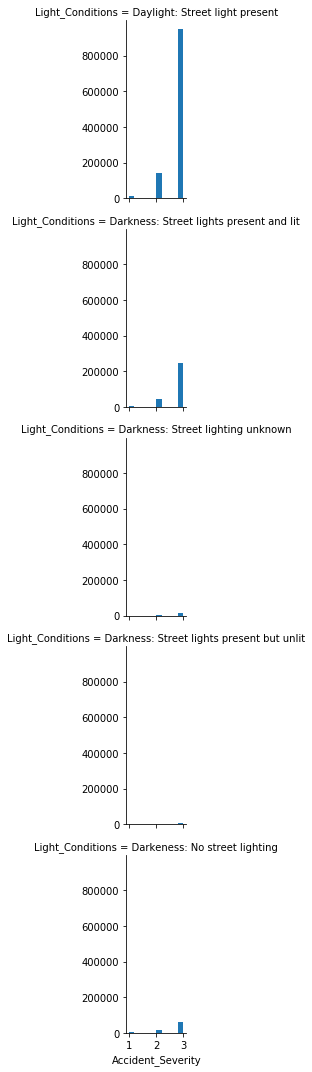

In [581]:
#fig = plt.figure(figsize = (20,29))
g = sns.FacetGrid(accidata,row = "Light_Conditions")
g.map(plt.hist, "Accident_Severity")

In [582]:
light_acci = accidata[["Light_Conditions","Accident_Severity"]].groupby("Light_Conditions")
light_acci["Accident_Severity"].describe()

,count,mean,std,min,25%,50%,75%,max
Light_Conditions,,,,,,,,
Darkeness: No street lighting,82559.0,2.719510,0.537615,1.0,3.0,3.0,3.0,3.0
Darkness: Street lighting unknown,16120.0,2.848449,0.390243,1.0,3.0,3.0,3.0,3.0
Darkness: Street lights present and lit,296340.0,2.823294,0.415759,1.0,3.0,3.0,3.0,3.0
Darkness: Street lights present but unlit,6909.0,2.815892,0.432438,1.0,3.0,3.0,3.0,3.0
Daylight: Street light present,1102222.0,2.851074,0.384127,1.0,3.0,3.0,3.0,3.0


In [583]:
print(light_acci.get_group(('Darkeness: No street lighting')).value_counts())
print(light_acci.get_group(('Darkness: Street lighting unknown')).value_counts())
print(light_acci.get_group(('Darkness: Street lights present and lit')).value_counts())
print(light_acci.get_group(('Darkness: Street lights present but unlit')).value_counts())
print(light_acci.get_group(('Daylight: Street light present')).value_counts())

Light_Conditions               Accident_Severity
Darkeness: No street lighting  3                    63002
                               2                    15957
                               1                     3600
dtype: int64
Light_Conditions                   Accident_Severity
Darkness: Street lighting unknown  3                    13868
                                   2                     2061
                                   1                      191
dtype: int64
Light_Conditions                         Accident_Severity
Darkness: Street lights present and lit  3                    248031
                                         2                     44253
                                         1                      4056
dtype: int64
Light_Conditions                           Accident_Severity
Darkness: Street lights present but unlit  3                    5764
                                           2                    1018
                                  

-->From the above three analysis(plots, table, particular groupvalues) we can say that most no of the accidents occured during Daylight: Street light present compared to remaining conditions.\
<br>
-->And second highest no of accidents occured during Darkness: Street lights present and lit.\
<br>
-->From above analysis(plots, groupvalues) of each conditions we can conclude that accidents with high severity i.e 3 occured mostly during Daylight: Street light present. And second highest no of accidents of severity 3 occured during Darkness: Street lights present and lit.\
<br>
-->We can also say that accidents with severity 2 occured mostly during Daylight: Street light present compared to remaining conditions. And second highest no of accidents of severity 2 occured during Darkness: Street lights present and lit. <br>
<br>
-->We can also say that accidents with severity 1 occured mostly during Daylight: Street light present compared to remaining conditions. And second highest no of accidents of severity 1 occured during Darkness: Street lights present and lit.<br>
<br>
-->From this interpretation we can say that our intution which says dim street lights will lead to more accidents and their severity would be high as well is wrong by high probability.

## Weather_Conditions vs Accident_Severity data analysis:

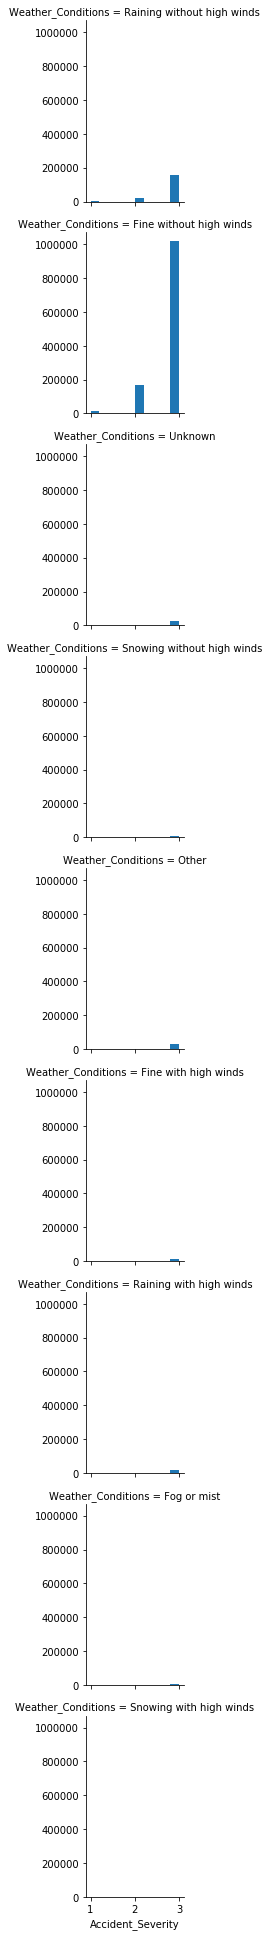

In [584]:
g = sns.FacetGrid(accidata,row = "Weather_Conditions")
g.map(plt.hist, "Accident_Severity")

In [585]:
weather_acci = accidata[["Weather_Conditions","Accident_Severity"]].groupby("Weather_Conditions")
weather_acci["Accident_Severity"].describe()

,count,mean,std,min,25%,50%,75%,max
Weather_Conditions,,,,,,,,
Fine with high winds,18355.0,2.816562,0.432130,1.0,3.0,3.0,3.0,3.0
Fine without high winds,1203943.0,2.832991,0.407354,1.0,3.0,3.0,3.0,3.0
Fog or mist,8190.0,2.816239,0.440146,1.0,3.0,3.0,3.0,3.0
Other,33503.0,2.872698,0.358679,1.0,3.0,3.0,3.0,3.0
Raining with high winds,20813.0,2.840052,0.401595,1.0,3.0,3.0,3.0,3.0
Raining without high winds,177663.0,2.858434,0.377355,1.0,3.0,3.0,3.0,3.0
Snowing with high winds,1960.0,2.872449,0.353002,1.0,3.0,3.0,3.0,3.0
Snowing without high winds,11301.0,2.888594,0.339017,1.0,3.0,3.0,3.0,3.0
Unknown,28296.0,2.887723,0.341938,1.0,3.0,3.0,3.0,3.0


In [586]:
print(weather_acci.get_group(('Fine with high winds')).value_counts())
print(weather_acci.get_group(('Fine without high winds')).value_counts())
print(weather_acci.get_group(('Fog or mist')).value_counts())
print(weather_acci.get_group(('Other')).value_counts())
print(weather_acci.get_group(('Raining with high winds')).value_counts())
print(weather_acci.get_group(('Raining without high winds')).value_counts())
print(weather_acci.get_group(('Snowing with high winds')).value_counts())
print(weather_acci.get_group(('Snowing without high winds')).value_counts())
print(weather_acci.get_group(('Unknown')).value_counts())

Weather_Conditions    Accident_Severity
Fine with high winds  3                    15327
                      2                     2689
                      1                      339
dtype: int64
Weather_Conditions       Accident_Severity
Fine without high winds  3                    1019019
                         2                     168779
                         1                      16145
dtype: int64
Weather_Conditions  Accident_Severity
Fog or mist         3                    6864
                    2                    1147
                    1                     179
dtype: int64
Weather_Conditions  Accident_Severity
Other               3                    29532
                    2                     3677
                    1                      294
dtype: int64
Weather_Conditions       Accident_Severity
Raining with high winds  3                    17764
                         2                     2769
                         1                      280
dt

In [587]:
1-((244+ 90+ 13+ 1854+ 280+ 294+ 179+ 339)/(16145+244+ 90+ 13+ 1854+ 280+ 294+ 179+ 339)) #probability of high severe accidents occured during Fine Without High winds.

0.8305895668278629

-->From the above three analysis(plots, table, particular groupvalues) we can say that most no of the accidents occured during Fine without high winds compared to remaining conditions.\
<br>
-->And second highest no of accidents occured during Raining without high winds.\
<br>
-->From above hist plots of each conditions we can conclude that accidents with high severity i.e 3 occured mostly during Fine without high winds. And second highest no of accidents of severity 3 occured during Raining without high winds.\
<br>
-->We can say that accidents with severity 2 occured mostly during Fine without high winds compared to remaining conditions. And second highest no of accidents of severity 2 occured during Raining without high winds.<br> 
<br>
-->We can say that accidents with severity 1 occured mostly during Fine without high winds compared to remaining conditions. And second highest no of accidents of severity 2 occured during Raining without high winds.\ 
<br>
-->Here we can consider Fine without high winds as a good weather and the condition Raining without high winds as bad weather.\
<br>
-->From this interpretation we can say that our intution which says bad weather will lead to more accidents and their severity would be high as well is wrong (by good amount of probability, say 0.83) which means 83% percentage of high severe accidents i.e with severity 1 occurs during good weather(Fine without high winds).

### 5. To predict the severity of the accidents which columns do you think are unnecessary and should be dropped before implementing a regression model. Support your statement using relevant plots and hypotheses derived from them.

In [588]:
accidata.head(10)

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002849,2005
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002857,2005
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002840,2005
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002863,2005
5,200501BS00006,524770.0,181160.0,-0.203238,51.515540,1,3,2,1,11/01/2005,...,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,Ol or diesel,None,1,Yes,E01002832,2005
6,200501BS00007,524220.0,180830.0,-0.211277,51.512695,1,3,2,1,13/01/2005,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002875,2005
7,200501BS00009,525890.0,179710.0,-0.187623,51.502260,1,3,1,2,14/01/2005,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002889,2005
8,200501BS00010,527350.0,177650.0,-0.167342,51.483420,1,3,2,2,15/01/2005,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002900,2005
9,200501BS00011,524550.0,180810.0,-0.206531,51.512443,1,3,2,5,15/01/2005,...,Central refuge,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002875,2005


In [589]:
#enter code/answer in this cell. You can add more code/markdown cells below for your answer. 
accidata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1504150 entries, 0 to 464696
Data columns (total 33 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Accident_Index                               1504150 non-null  object 
 1   Location_Easting_OSGR                        1504049 non-null  float64
 2   Location_Northing_OSGR                       1504049 non-null  float64
 3   Longitude                                    1504049 non-null  float64
 4   Latitude                                     1504049 non-null  float64
 5   Police_Force                                 1504150 non-null  int64  
 6   Accident_Severity                            1504150 non-null  int64  
 7   Number_of_Vehicles                           1504150 non-null  int64  
 8   Number_of_Casualties                         1504150 non-null  int64  
 9   Date                                         15

In [590]:
for i in accidata.columns:
     print(i,"length=",accidata[i].unique().shape[0])

Accident_Index length= 927387
Location_Easting_OSGR length= 182520
Location_Northing_OSGR length= 221878
Longitude length= 1059047
Latitude length= 1001149
Police_Force length= 51
Accident_Severity length= 3
Number_of_Vehicles length= 27
Number_of_Casualties length= 47
Date length= 3286
Day_of_Week length= 7
Time length= 1440
Local_Authority_(District) length= 416
Local_Authority_(Highway) length= 207
1st_Road_Class length= 6
1st_Road_Number length= 6854
Road_Type length= 6
Speed_limit length= 8
Junction_Detail length= 1
Junction_Control length= 5
2nd_Road_Class length= 7
2nd_Road_Number length= 7235
Pedestrian_Crossing-Human_Control length= 4
Pedestrian_Crossing-Physical_Facilities length= 7
Light_Conditions length= 5
Weather_Conditions length= 10
Road_Surface_Conditions length= 6
Special_Conditions_at_Site length= 9
Carriageway_Hazards length= 7
Urban_or_Rural_Area length= 3
Did_Police_Officer_Attend_Scene_of_Accident length= 3
LSOA_of_Accident_Location length= 35453
Year length= 9


In [591]:
accidata.isnull().sum()

Accident_Index                                       0
Location_Easting_OSGR                              101
Location_Northing_OSGR                             101
Longitude                                          101
Latitude                                           101
Police_Force                                         0
Accident_Severity                                    0
Number_of_Vehicles                                   0
Number_of_Casualties                                 0
Date                                                 0
Day_of_Week                                          0
Time                                               117
Local_Authority_(District)                           0
Local_Authority_(Highway)                            0
1st_Road_Class                                       0
1st_Road_Number                                      0
Road_Type                                            0
Speed_limit                                          0
Junction_D

In [592]:
accidata_X = accidata.drop(['Accident_Severity','Accident_Index','Location_Easting_OSGR','Location_Northing_OSGR','Date','Junction_Detail','LSOA_of_Accident_Location'],axis = 1)
accidata_y = accidata['Accident_Severity']
accidata_X.shape

(1504150, 26)

### Hypothesis:
'Accident_Index' - Accident index is nothing to do with Accident Severity.<br>
'Location_Easting_OSGR' - As latitude and longitude(which says about the locationare) are there Location_Easting_OSGR is not required.<br>
'Location_Northing_OSGR' - As latitude and longitude(which says about the locationare) are there Location_Easting_OSGR is not required.<br>
'Date' -  We can extract only month from the data as time, year, day of week are already present.<br>
'Junction_Detail' - No information is provided, all values are nans.<br>
'LSOA_of_Accident_Location' - Considering this sayys some location, we can ignore it.

In [593]:
for i in accidata_X.columns:
     print(i,"unique_values:",accidata_X[i].unique(),",length=",accidata_X[i].unique().shape[0])

Longitude unique_values: [-0.19117  -0.211708 -0.206458 ... -3.230826 -3.191397 -3.348426] ,length= 1059047
Latitude unique_values: [51.489096 51.520075 51.525301 ... 54.985668 54.990446 55.1067  ] ,length= 1001149
Police_Force unique_values: [ 1 48  3  4  5  6  7 10 11 12 13 14 16 17 20 21 22 23 30 31 32 33 34 35
 36 37 40 41 42 43 44 45 46 47 50 52 53 54 55 60 61 62 63 91 92 93 94 95
 96 97 98] ,length= 51
Number_of_Vehicles unique_values: [ 1  2  4  3  5  6  8  7 13 10 11 18  9 20 17 15 12 14 22 16 28 32 19 29
 34 67 21] ,length= 27
Number_of_Casualties unique_values: [ 1  2  5  4  3  8  7  6 10  9 23 17 13 11 19 15 16 12 14 18 20 29 21 35
 22 26 45 41 36 40 25 28 42 68 27 48 24 43 87 63 51 33 38 46 70 93 54] ,length= 47
Day_of_Week unique_values: [3 4 5 6 2 7 1] ,length= 7
Time unique_values: ['17:42' '17:36' '00:15' ... '05:57' '04:26' '01:57'] ,length= 1440
Local_Authority_(District) unique_values: [ 12   1  11 570   5   8   4   3   2   9  28  31  30  27  24  13  17  57
  26  29 

In [594]:
accidata_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1504150 entries, 0 to 464696
Data columns (total 26 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Longitude                                    1504049 non-null  float64
 1   Latitude                                     1504049 non-null  float64
 2   Police_Force                                 1504150 non-null  int64  
 3   Number_of_Vehicles                           1504150 non-null  int64  
 4   Number_of_Casualties                         1504150 non-null  int64  
 5   Day_of_Week                                  1504150 non-null  int64  
 6   Time                                         1504033 non-null  object 
 7   Local_Authority_(District)                   1504150 non-null  int64  
 8   Local_Authority_(Highway)                    1504150 non-null  object 
 9   1st_Road_Class                               15

### 6. Implement a basic Logistic Regression Model using scikit learn with cross validation = 5, where you predict the severity of the accident (Accident_Severity). Note that here your goal is not to tune appropriate hyperparameters, but to figure out what features will be best to use.

'Number_of_Vehicles', 'Number_of_Casualties', Day_of_Week, 'Local_Authority_(District)', 'Local_Authority_(Highway)', '1st_Road_Number', 'Road_Type', 'Speed_limit', '2nd_Road_Number', 'Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions', 'Special_Conditions_at_Site','Carriageway_Hazards', 'Urban_or_Rural_Area' these are the best features compared to dropped features.
Some of the reasons are specified in the above section.

In [595]:
#enter code/answer in this cell. You can add more code/markdown cells below for your answer. 

In [596]:
selected_features = ['Did_Police_Officer_Attend_Scene_of_Accident','Number_of_Vehicles','Number_of_Casualties', 'Day_of_Week', 'Local_Authority_(District)', 'Local_Authority_(Highway)', '1st_Road_Number', 'Road_Type', 'Speed_limit', '2nd_Road_Number', 'Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions', 'Special_Conditions_at_Site','Carriageway_Hazards', 'Urban_or_Rural_Area']
accidata3_X = accidata3[selected_features]
accidata3_y = accidata3['Accident_Severity']
accidata3_X.shape

(464697, 16)

In [597]:
for i in accidata3_X.columns:
    if accidata3_X[i].dtype == 'object':
        accidata3_X[i] = accidata3_X[i].astype('category')
        accidata3_X[i] = accidata3_X[i].cat.codes
accidata3_X.dtypes

Did_Police_Officer_Attend_Scene_of_Accident     int8
Number_of_Vehicles                             int64
Number_of_Casualties                           int64
Day_of_Week                                    int64
Local_Authority_(District)                     int64
Local_Authority_(Highway)                      int16
1st_Road_Number                                int64
Road_Type                                       int8
Speed_limit                                    int64
2nd_Road_Number                                int64
Light_Conditions                                int8
Weather_Conditions                              int8
Road_Surface_Conditions                         int8
Special_Conditions_at_Site                      int8
Carriageway_Hazards                             int8
Urban_or_Rural_Area                            int64
dtype: object

In [598]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn import metrics

model = LogisticRegression(max_iter = 1000000,)
model.fit(accidata3_X,accidata3_y)
predict = cross_val_predict(model, accidata3_X, accidata3_y, cv=5)
print(metrics.accuracy_score(accidata3_y, predict))

KeyboardInterrupt: 

Solution for 3.6 is in kaggle link --https://www.kaggle.com/gopalsvs/notebook7d6f7eb198?scriptVersionId=44504183

-->Accuracy of the model for accidata3 is 84.44%.